In [8]:
import matplotlib.pyplot as plt
import json, os
import pandas as pd

In [20]:
    
def get_victim(log_file, model):
    victims = {}
    model_detected = None
    with open(log_file, "r") as file_object:
        for i, line in enumerate(file_object):
            if 'attacking' in line and line.split(' ')[1].split('/')[2].strip() == str(model):
                model_detected = str(model)
            
            if model_detected and "Attack:" in line:
                return line.split(' ')[1].strip() , line.split(' ')[2].strip()
    
    return None, None

victim, peer = get_victim("../data/103/log200",9)

print(victim,peer)


41 1


In [64]:
def get_col(test_range,con):
    output = []
    for test_no in test_range:
        dir ="../data/"+str(test_no)
        subdirs = [x[0] for x in os.walk(dir)][1:]
        for subdir in subdirs:    
            model_no = subdir.split('/')[3]
            model_data=[]
            for no in range(200,206):
                save_no = no+0.1*con
                fee_con_file = '../data/'+str(test_no)+'/'+str(model_no)+'/'+str(save_no)+'_fee_con_data.json'
                if not os.path.isfile(fee_con_file): break
                agent, peer = get_victim('../data/'+str(test_no)+'/log200',model_no)
                data = {}
                with open(fee_con_file) as f:
                    for j,line in enumerate(f):
                        data = json.loads(line)

                col = []
                for t, node_val in data.items():
                    if int(t)%5==0:
                        for node, val in node_val.items():
                            if node == str(agent):
                                peers = list(val['m'].keys())
                                col.append(val['l'][str(peers.index(peer))])
                df = pd.DataFrame(col)
                
                Q1 = df[0].quantile(0.25)
                Q3 = df[0].quantile(0.75)
                IQR = Q3 - Q1    #IQR is interquartile range. 
                filter = (df[0] >= Q1 - 1.5 * IQR) & (df[0] <= Q3 + 1.5 *IQR)
                model_data.append(df.loc[filter].mean()[0])
            output.append(model_data)
    return output





In [65]:
get_col(range(101,102),1)

0 45 13 0
5 45 13 19.04
10 45 13 21
15 45 13 4
20 45 13 31.04
25 45 13 13
30 45 13 8
35 45 13 0
40 45 13 22.06
45 45 13 29.07
50 45 13 15
55 45 13 14
60 45 13 4
65 45 13 0
70 45 13 12
75 45 13 16
80 45 13 18.05
85 45 13 14
90 45 13 18
95 45 13 0
100 45 13 12.07
105 45 13 14
110 45 13 4
115 45 13 5
120 45 13 4
125 45 13 20.13
130 45 13 0
135 45 13 0
140 45 13 6
145 45 13 23.08
150 45 13 15.09
155 45 13 7
160 45 13 5
165 45 13 17
170 45 13 7.07
175 45 13 22
180 45 13 8
185 45 13 14.05
190 45 13 6
195 45 13 34.129999999999995
200 45 13 11
205 45 13 8
210 45 13 9
215 45 13 14
220 45 13 15
225 45 13 0
230 45 13 18.09
235 45 13 20
240 45 13 18
245 45 13 7
250 45 13 12
255 45 13 12.05
260 45 13 8
265 45 13 4
270 45 13 17
275 45 13 0
280 45 13 9
285 45 13 0
290 45 13 9
295 45 13 45.05
300 45 13 23
305 45 13 13.08
310 45 13 16
315 45 13 8
320 45 13 0
325 45 13 18
330 45 13 16.04
335 45 13 11.04
340 45 13 0
345 45 13 8.04
350 45 13 0
355 45 13 20
360 45 13 13
365 45 13 16
370 45 13 15
375 45 13 

KeyError: '35'

In [31]:
locked_s = get_col(range(101,106),1)
locked_m = get_col(range(101,106),2)
locked_o = get_col(range(101,106),3)


In [34]:
print(mean(locked_s))
print(mean(locked_m))
print(mean(locked_o))

(67, 6)
(63, 6)
(65, 6)
(64, 6)
(65, 6)
(65, 6)
[14.12340016061826, 87.01455212450281, 100.1034439714872, 101.08814822367475, 101.99061668047878, 101.63258418474999]
(67, 6)
(65, 6)
(66, 6)
(65, 6)
(65, 6)
(64, 6)
[18.679855642913612, 88.38589116601044, 103.4561514178727, 107.46583843542966, 111.24223728495073, 110.29909464321615]
(67, 6)
(65, 6)
(65, 6)
(65, 6)
(65, 6)
(65, 6)
[15.611582960317927, 86.38013494068518, 102.6725734376485, 104.76894078026605, 104.93068525124953, 104.94102714835265]


In [14]:
def mean(data):
    df = pd.DataFrame(data)
    result = []
    for i in range(6):
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1    #IQR is interquartile range. 
        filter = (df[i] >= Q1 - 1.5 * IQR) & (df[i] <= Q3 + 1.5 *IQR)
        filtered = df.loc[filter]
        print(filtered.shape)
        result.append(filtered.mean()[i])
    return result

def percentage_drop(data):
    return [[d*100/item[0] for d in item if item[0]] for item in data]

def combined_percentage_hike(fee_data,fail_data):
    return [[fail_data[i][j]/fee_data[i][j] for j,d in enumerate(item)] for i,item in enumerate(fee_data)]

def percentage_hike(data):
    return [[(d-item[0])*100/item[0] for d in item if item[0]] for item in data]

def process_ex(data):
    return [[d*100/item[0] for d in item] for item in data]
    
def scatter(x,data):
    for d in data:
        if d: plt.scatter(x, d, marker='o')
    plt.show()


    

In [6]:

def attack_analyze(tests,save_range,controller,param):
    data = []
    for test in tests:
        dir = '../data/'+str(test)+'/'
        log_file = dir+'log'+str(save_range[0])
        subdirs = [x[0] for x in os.walk(dir)][1:]
        for subdir in subdirs:    
            model_no = subdir.split('/')[3]
            victim, peer = get_victim(log_file, str(model_no))
            exp_data =[]
            for save_no in save_range:
                out_file =  subdir+'/'+str(save_no+round(controller*0.1,1))+'_out.json'
                if not os.path.isfile(out_file): continue
                with open(out_file, "r") as file_object:
                    for i, line in enumerate(file_object):
                        param_data = json.loads(line)[str(victim)][param]
                        exp_data.append(param_data)
                        print(test,model_no,save_no,controller,param_data)
                        break
            data.append(exp_data)
    return data


In [11]:
fee_s = mean(percentage_drop(attack_analyze(range(101,106),range(200,206),1,'fee_total')))
fee_m=mean(percentage_drop(attack_analyze(range(101,106),range(200,206),2,'fee_total')))
fee_o=mean(percentage_drop(attack_analyze(range(101,106),range(200,206),3,'fee_total')))



101 9 200 1 190.8599999999998
101 9 201 1 174.00999999999985
101 9 202 1 129.59999999999988
101 9 203 1 129.36999999999986
101 9 204 1 126.20999999999988
101 9 205 1 126.20999999999988
101 0 200 1 226.23999999999972
101 0 201 1 214.23999999999972
101 0 202 1 186.34999999999985
101 0 203 1 187.85999999999976
101 0 204 1 174.97999999999985
101 0 205 1 176.05999999999977
101 11 200 1 98.74999999999989
101 11 201 1 92.51999999999988
101 11 202 1 79.99999999999991
101 11 203 1 79.05999999999989
101 11 204 1 77.26999999999992
101 11 205 1 77.1799999999999
101 7 200 1 112.1099999999999
101 7 201 1 114.71999999999986
101 7 202 1 93.5499999999999
101 7 203 1 97.10999999999993
101 7 204 1 96.73999999999991
101 7 205 1 96.73999999999991
101 6 200 1 285.3699999999997
101 6 201 1 262.45999999999987
101 6 202 1 233.70999999999975
101 6 203 1 231.99999999999977
101 6 204 1 224.33999999999975
101 6 205 1 224.33999999999975
101 1 200 1 129.2199999999999
101 1 201 1 124.87999999999992
101 1 202 1 89.559

In [103]:
f_s = attack_analyze(range(101,106),range(200,206),1,'fee_total')
f_m=attack_analyze(range(101,106),range(200,206),2,'fee_total')
f_o=attack_analyze(range(101,106),range(200,206),3,'fee_total')


101 9 200 1 190.8599999999998
101 9 201 1 174.00999999999985
101 9 202 1 129.59999999999988
101 9 203 1 129.36999999999986
101 9 204 1 126.20999999999988
101 9 205 1 126.20999999999988
101 0 200 1 226.23999999999972
101 0 201 1 214.23999999999972
101 0 202 1 186.34999999999985
101 0 203 1 187.85999999999976
101 0 204 1 174.97999999999985
101 0 205 1 176.05999999999977
101 11 200 1 98.74999999999989
101 11 201 1 92.51999999999988
101 11 202 1 79.99999999999991
101 11 203 1 79.05999999999989
101 11 204 1 77.26999999999992
101 11 205 1 77.1799999999999
101 7 200 1 112.1099999999999
101 7 201 1 114.71999999999986
101 7 202 1 93.5499999999999
101 7 203 1 97.10999999999993
101 7 204 1 96.73999999999991
101 7 205 1 96.73999999999991
101 6 200 1 285.3699999999997
101 6 201 1 262.45999999999987
101 6 202 1 233.70999999999975
101 6 203 1 231.99999999999977
101 6 204 1 224.33999999999975
101 6 205 1 224.33999999999975
101 1 200 1 129.2199999999999
101 1 201 1 124.87999999999992
101 1 202 1 89.559

In [107]:
pdf_s = pd.DataFrame(f_s)
pdf_m = pd.DataFrame(f_m)
pff_o = pd.DataFrame(f_o)

In [109]:
pdf_m

,0,1,2,3,4,5
0,289.042991,256.165610,216.092905,230.750737,216.681354,216.681354
1,290.520928,271.834653,253.358495,249.881709,242.466573,238.690148
2,97.241189,83.106779,72.086636,71.867894,66.393312,66.948640
3,147.756743,142.924356,141.017949,141.335854,133.154255,135.231132
4,337.891392,334.745100,301.424448,291.835200,288.019917,285.152354
...,...,...,...,...,...,...
63,187.068551,186.419282,164.707267,168.985151,167.962788,155.477235
64,252.587096,236.349298,202.219246,202.409641,198.153874,198.153874
65,230.610015,204.566659,158.740018,157.264369,154.135526,154.135526
66,266.758317,247.018011,234.471491,222.091002,226.371216,220.694274


In [110]:
pdf_s

,0,1,2,3,4,5
0,190.86,174.01,129.60,129.37,126.21,126.21
1,226.24,214.24,186.35,187.86,174.98,176.06
2,98.75,92.52,80.00,79.06,77.27,77.18
3,112.11,114.72,93.55,97.11,96.74,96.74
4,285.37,262.46,233.71,232.00,224.34,224.34
...,...,...,...,...,...,...
63,79.71,73.24,58.32,55.55,49.85,49.85
64,242.90,224.45,174.90,167.68,164.11,164.11
65,249.21,213.14,182.49,168.80,170.99,171.05
66,162.88,167.85,155.63,150.48,153.26,153.26


In [123]:
mean(pdf_m.divide(pff_o)*100)


(68, 6)
(68, 6)
(64, 6)
(64, 6)
(62, 6)
(64, 6)


[121.96433017147316,
 122.71140260622599,
 123.92986724776625,
 123.3973827558381,
 121.2496920203058,
 123.16042450639499]

In [121]:
mean(pdf_m.divide(pdf_s)*100)


(66, 6)
(67, 6)
(67, 6)
(67, 6)
(67, 6)
(67, 6)


[128.08054220653898,
 131.25464920251386,
 134.09497361922152,
 135.69666771520895,
 136.0755953701926,
 136.37332312058265]

In [122]:
pdf_m.divide(pff_o)


,0,1,2,3,4,5
0,1.572868,1.551115,1.710618,1.968463,1.908491,1.908491
1,1.161206,1.165680,1.212764,1.204541,1.220418,1.201242
2,1.032207,0.830132,0.857988,0.864463,0.794575,0.824920
3,1.447108,1.438872,1.667061,1.679337,1.557928,1.535356
4,1.028422,1.090030,1.105330,1.135290,1.145924,1.147757
...,...,...,...,...,...,...
63,1.461066,1.638757,1.869494,1.859099,1.878600,1.738954
64,1.264962,1.280688,1.373437,1.393061,1.365699,1.365699
65,1.098262,1.093201,1.278908,1.372269,1.332261,1.332261
66,1.655782,1.736985,1.691809,1.591803,1.616713,1.576169


In [35]:
print(fee_s)
print(fee_m)
print(fee_o)

[100.0, 94.80760810749182, 84.25409513337928, 82.49224758319224, 80.8159302881092, 80.62527293771463]
[100.0, 97.03253427142623, 87.66841066091023, 86.1641718961332, 84.8048129029539, 84.68410770179514]
[100.0, 95.5590062090346, 85.74585856142228, 83.72338906172624, 82.56014221332565, 82.35941883171495]


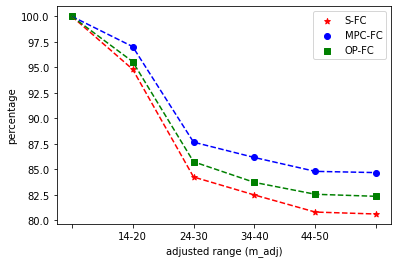

In [12]:


fig, ax = plt.subplots()
# ax.plot([0,10,20,30,40,50],adjustment.stack().values,color='black'  , linestyle='-')



plt.xticks([0,10,20,30,40,50],['','14-20','24-30','34-40','44-50',''])
plt.xlabel('adjusted range (m_adj)')
plt.ylabel('percentage')
plt.legend()
plt.show()

In [23]:
fail_s = mean(percentage_hike(attack_analyze(range(101,106),range(200,206),1,'ex_failures_total')))
fail_m=mean(percentage_hike(attack_analyze(range(101,106),range(200,206),2,'ex_failures_total')))
fail_o=mean(percentage_hike(attack_analyze(range(101,106),range(200,206),3,'ex_failures_total')))


101 9 200 1 145.2699999999996
101 9 201 1 154.49999999999955
101 9 202 1 157.8999999999995
101 9 203 1 161.17999999999967
101 9 204 1 160.69999999999965
101 9 205 1 160.69999999999965
101 0 200 1 80.94999999999982
101 0 201 1 93.26999999999977
101 0 202 1 94.14999999999978
101 0 203 1 97.21999999999976
101 0 204 1 94.65999999999987
101 0 205 1 104.46999999999983
101 11 200 1 25.83
101 11 201 1 33.19999999999999
101 11 202 1 36.36999999999998
101 11 203 1 36.73999999999997
101 11 204 1 38.299999999999955
101 11 205 1 38.009999999999955
101 7 200 1 46.62000000000016
101 7 201 1 46.0900000000001
101 7 202 1 50.95999999999997
101 7 203 1 52.08000000000002
101 7 204 1 51.280000000000065
101 7 205 1 51.280000000000065
101 6 200 1 87.39999999999985
101 6 201 1 91.33999999999978
101 6 202 1 99.36999999999976
101 6 203 1 99.6299999999997
101 6 204 1 102.51999999999968
101 6 205 1 102.51999999999968
101 1 200 1 52.11999999999987
101 1 201 1 53.6899999999999
101 1 202 1 64.90999999999985
101 1 20

In [43]:
fail_o

[0.0,
 11.585616522194513,
 34.64039378629489,
 34.5314981765732,
 36.06833386944715,
 37.109647676554495]

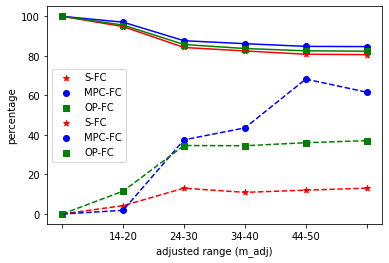

In [26]:


fig, ax = plt.subplots()
# ax.plot([0,10,20,30,40,50],adjustment.stack().values,color='black'  , linestyle='-')

ax.scatter([0,10,20,30,40,50], fee_s,color='red'  , marker='*', label='S-FC')
ax.scatter([0,10,20,30,40,50], fee_m,color='blue' , marker='o', label='MPC-FC')
ax.scatter([0,10,20,30,40,50],fee_o,color='green', marker='s', label='OP-FC')

ax.plot([0,10,20,30,40,50], fee_s,color='red'  , linestyle='-')
ax.plot([0,10,20,30,40,50], fee_m,color='blue' , linestyle='-')
ax.plot([0,10,20,30,40,50],fee_o,color='green', linestyle='-')

ax.scatter([0,10,20,30,40,50], fail_s,color='red'  , marker='*', label='S-FC')
ax.scatter([0,10,20,30,40,50], fail_m,color='blue' , marker='o', label='MPC-FC')
ax.scatter([0,10,20,30,40,50],fail_o,color='green', marker='s', label='OP-FC')

ax.plot([0,10,20,30,40,50], fail_s,color='red'  , linestyle='--')
ax.plot([0,10,20,30,40,50], fail_m,color='blue' , linestyle='--')
ax.plot([0,10,20,30,40,50],fail_o,color='green', linestyle='--')

plt.xticks([0,10,20,30,40,50],['0','40','24-30','34-40','44-50',''])
plt.xlabel('adjusted range (m_adj)')
plt.ylabel('percentage')

plt.legend()
plt.show()

No handles with labels found to put in legend.


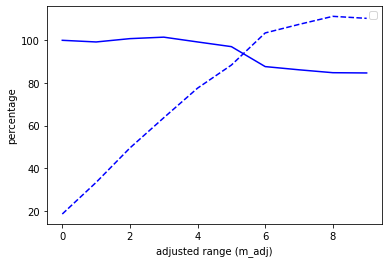

In [37]:
lm = [18.522591238991414,
 33.34808940898813,
 49.50568380189928,
 63.67082398600309,
 77.56334560532011, 88.38589116601044, 103.4561514178727, 107.46583843542966, 111.24223728495073, 110.29909464321615]

fm = [100.0, 99.22292396189385, 100.78215593267326, 101.47770293047182, 99.2296364117222, 97.03253427142623, 87.66841066091023, 86.1641718961332, 84.8048129029539, 84.68410770179514]




fig, ax = plt.subplots()

ax.plot(range(0,len(lm)), fm,color='blue' , linestyle='-')
ax.plot(range(0,len(lm)), lm,color='blue' , linestyle='--')


plt.xlabel('adjusted range (m_adj)')
plt.ylabel('percentage')

plt.legend()
plt.show()

No handles with labels found to put in legend.


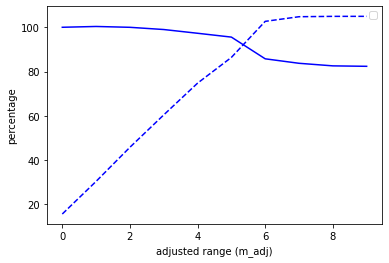

In [39]:
lo=[15.61549909184441,
 30.36994426830454,
 45.779430169576656,
 60.403825588669854,
 74.74676112711826, 86.38013494068518, 102.6725734376485, 104.76894078026605, 104.93068525124953, 104.94102714835265]

fo=[100.0, 100.3626007557611, 99.98218873368168, 98.98041961759692, 97.29128948003313, 95.5590062090346, 85.74585856142228, 83.72338906172624, 82.56014221332565, 82.35941883171495]


fig, ax = plt.subplots()

ax.plot(range(0,len(lo)), fo,color='blue' , linestyle='-')
ax.plot(range(0,len(lo)), lo,color='blue' , linestyle='--')


plt.xlabel('adjusted range (m_adj)')
plt.ylabel('percentage')

plt.legend()
plt.show()

No handles with labels found to put in legend.


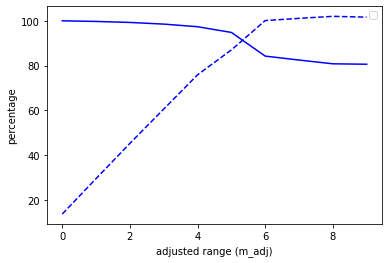

In [40]:
ls =[13.812181515638853,
 29.630209755976043,
 45.34177008317565,
 60.63321616624756,
 75.90790362865886, 87.01455212450281, 100.1034439714872, 101.08814822367475, 101.99061668047878, 101.63258418474999]

fs = [100.0, 99.71314851724513, 99.26816071040024, 98.52417891570242, 97.35837052728682, 94.80760810749182, 84.25409513337928, 82.49224758319224, 80.8159302881092, 80.62527293771463]

fig, ax = plt.subplots()

ax.plot(range(0,len(ls)), fs,color='blue' , linestyle='-')
ax.plot(range(0,len(ls)), ls,color='blue' , linestyle='--')


plt.xlabel('adjusted range (m_adj)')
plt.ylabel('percentage')

plt.legend()
plt.show()

No handles with labels found to put in legend.


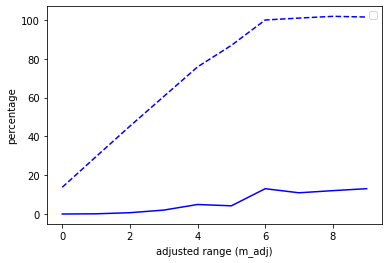

In [44]:
es = [0.0,
 0.10623918311048673,
 0.6723818219203341,
 2.0211053597741,
 4.908561365565122,
 4.2303050450158555,
 13.062747839902414,
 10.950056788592601,
 12.05871686842145,
 13.070150123772718]

fig, ax = plt.subplots()

ax.plot(range(0,len(ls)), es,color='blue' , linestyle='-')
ax.plot(range(0,len(ls)), ls,color='blue' , linestyle='--')


plt.xlabel('adjusted range (m_adj)')
plt.ylabel('percentage')

plt.legend()
plt.show()

No handles with labels found to put in legend.


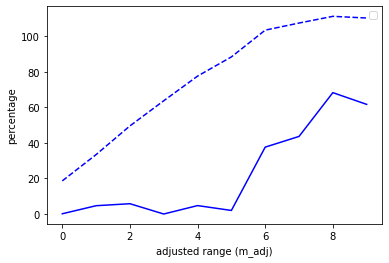

In [45]:
em=[0.0,
 4.535107872695332,
 5.659289762820148,
 -0.14097518745959464,
 4.605813291442878,
 1.866307076879635,
 37.54356867418479,
 43.56928488713747,
 68.2490280341832,
 61.63693972554121]

fig, ax = plt.subplots()

ax.plot(range(0,len(lm)), em,color='blue' , linestyle='-')
ax.plot(range(0,len(lm)), lm,color='blue' , linestyle='--')


plt.xlabel('adjusted range (m_adj)')
plt.ylabel('percentage')

plt.legend()
plt.show()

No handles with labels found to put in legend.


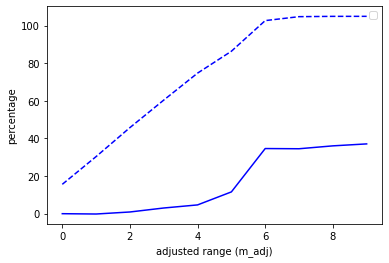

In [46]:
eo = [0.0,
 -0.16987028509245736,
 0.9076887706376218,
 3.026606226935143,
 4.669338938690343,
 11.585616522194513,
 34.64039378629489,
 34.5314981765732,
 36.06833386944715,
 37.109647676554495]

fig, ax = plt.subplots()

ax.plot(range(0,len(lo)), eo,color='blue' , linestyle='-')
ax.plot(range(0,len(lo)), lo,color='blue' , linestyle='--')



plt.xlabel('adjusted range (m_adj)')
plt.ylabel('percentage')

plt.legend()
plt.show()

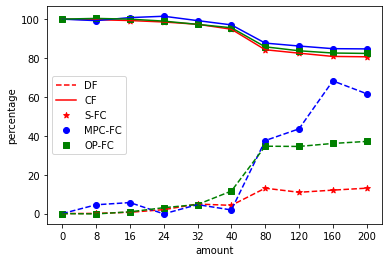

In [102]:


fig, ax = plt.subplots()
# ax.plot([0,10,20,30,40,50],adjustment.stack().values,color='black'  , linestyle='-')


ax.scatter(range(len(ls)), es,color='red'  , marker='*')
ax.scatter(range(len(ls)), em,color='blue' , marker='o')
ax.scatter(range(len(ls)),eo,color='green', marker='s')

ax.plot(range(len(ls)), es,color='red'  , linestyle='--', label='DF')
ax.plot(range(len(ls)), em,color='blue' , linestyle='--')
ax.plot(range(len(ls)),eo,color='green', linestyle='--')

# ax.plot(range(len(ls)), ls,color='red'  , linestyle=':', label='Collateral')
# ax.plot(range(len(lm)), lm,color='blue' , linestyle=':')
# ax.plot(range(len(lo)),lo,color='green', linestyle=':')

# ax.scatter(range(len(ls)), ls,color='red'  , marker='*')
# ax.scatter(range(len(ls)), lm,color='blue' , marker='o')
# ax.scatter(range(len(ls)),lo,color='green', marker='s')

ax.scatter(range(len(ls)), fs,color='red'  , marker='*', label='S-FC')
ax.scatter(range(len(ls)), fm,color='blue' , marker='o', label='MPC-FC')
ax.scatter(range(len(ls)),fo,color='green', marker='s', label='OP-FC')

ax.plot(range(len(ls)), fs,color='red'  , linestyle='-', label='CF')
ax.plot(range(len(ls)), fm,color='blue' , linestyle='-')
ax.plot(range(len(ls)),fo,color='green', linestyle='-')

 
plt.xticks(range(len(ls)),[0, 8, 16, 24, 32, 40, 80, 120, 160, 200])
plt.xlabel('amount')
plt.ylabel('percentage')
plt.legend(loc='best')
plt.show()